**B3**

Коцевич Андрей, Б02-920

Теоретическая задача 3 решена в отдельном файле.

In [36]:
import numpy as np
import scipy.sparse
import scipy.linalg
import sys
import time
from matplotlib import pyplot as plt

**1.** Реализовать с помощью scipy генератор полосатых матриц, который должен поддерживать функции:
* Генерация абсолютно случайной полосатой матрицы $n\times m$
* Генерация полосатой матрицы с постоянными коэффициентами вдоль каждой полосы $n\times n$
* Генерация случайного возмущения матрицы $n\times m$, каждый элемент которой не превосходит по модулю заданный $\varepsilon$
* Генерация полосатой матрицы, в которой полосы заданы векторами.

 Сравнить три приведённых ниже метода создания матриц между собой по использованию памяти, используя измерение размера объектов в Python (sys.getsizeof(object[, default])). 
 Реализовать генератор матриц всеми тремя методами, сравнить их также по скорости (для решения систем уравнений).


In [37]:
def generate_random_striped_matrix(N, sposob): #генерация случайной полосатой матрицы каким-то их 3 способов
    if sposob == 1:
        d1 = np.random.uniform(-1, 1, size=N - 1)
        d2 = np.random.uniform(-1, 1, size=N)
        d3 = np.random.uniform(-1, 1, size=N - 1)
        diagonals = [d1, d2, d3]
        return scipy.sparse.diags(diagonals, [-1, 0, 1]).toarray()
    if sposob == 2:
        A = np.zeros([3, N])
        d1 = np.random.uniform(-1, 1, size=N)
        d2 = np.random.uniform(-1, 1, size=N)
        d3 = np.random.uniform(-1, 1, size=N)
        A[0] = d1
        A[1] = d2
        A[2] = d3
        return A
    if sposob == 3:
        d1 = np.random.uniform(-1, 1, size=N - 1)
        d2 = np.random.uniform(-1, 1, size=N)
        d3 = np.random.uniform(-1, 1, size=N - 1)
        diagonals = [d1, d2, d3]
        return scipy.sparse.diags(diagonals, [-1,0, 1])
    
def generate_striped_matrix_const(N, A, B, C, sposob): #генерация полосатой матрицы с постоянными коэффициентами
    if sposob == 1:
        d1 = A * np.ones(N-1)
        d2 = B * np.ones(N)
        d3 = C * np.ones(N-1)
        diagonals = [d1, d2, d3]
        return scipy.sparse.diags(diagonals, [-1, 0, 1]).toarray()
    if sposob == 2:
        A = np.zeros([N, N])
        d1 = A * np.ones(N)
        d2 = B * np.ones(N)
        d3 = C * np.ones(N)
        A[0] = d1
        A[int(N / 2)] = d2
        A[N - 1] = d3
        return A
    if sposob == 3:
        d1 = A * np.ones(N-1)
        d2 = B * np.ones(N)
        d3 = C * np.ones(N-1)
        diagonals = [d1, d2, d3]
        return scipy.sparse.diags(diagonals, [-1,0, 1])

def generate_perturbation(N, eps, sposob): #генерация случайного возмущения матрицы
    if sposob == 1:
        d1 = np.random.uniform(-eps, eps, size=N - 1)
        d2 = np.random.uniform(-eps, eps, size=N)
        d3 = np.random.uniform(-eps, eps, size=N - 1)
        diagonals = [d1, d2, d3]
        return scipy.sparse.diags(diagonals, [-1, 0, 1]).toarray()
    if sposob == 2:
        A = np.zeros([N, N])
        d1 = np.random.uniform(-eps, eps, size=N)
        d2 = np.random.uniform(-eps, eps, size=N)
        d3 = np.random.uniform(-eps, eps, size=N)
        A[0] = d1
        A[int(N / 2)] = d2
        A[N - 1] = d3
        return A
    if sposob == 3:
        d1 = np.random.uniform(-eps, eps, size=N - 1)
        d2 = np.random.uniform(-eps, eps, size=N)
        d3 = np.random.uniform(-eps, eps, size=N - 1)
        diagonals = [d1, d2, d3]
        return scipy.sparse.diags(diagonals, [-1,0, 1])

def generate_band_matrix(N, d1, d2, d3, sposob): #генерация полосатой матрицы, в которой полосы заданы векторами
    if sposob == 1:
        diagonals = [d1, d2, d3]
        return scipy.sparse.diags(diagonals, [-1, 0, 1]).toarray()
    if sposob == 2:
        A = np.zeros([N, N])
        A[0] = d1
        A[int(N / 2)] = d2
        A[N - 1] = d3
        return A
    if sposob == 3:
        diagonals = [d1, d2, d3]
        return scipy.sparse.diags(diagonals, [-1,0, 1])

In [56]:
A = generate_random_striped_matrix(5, 1)
B = generate_random_striped_matrix(5, 2)
C = generate_random_striped_matrix(5, 3)
print(A,B,C)
sys.getsizeof(A), sys.getsizeof(B), sys.getsizeof(C)

[[ 0.30807595  0.15668246  0.          0.          0.        ]
 [ 0.33330091 -0.06170085 -0.41060352  0.          0.        ]
 [ 0.          0.49025594  0.16323619 -0.45692476  0.        ]
 [ 0.          0.          0.31378833  0.95493422 -0.33030467]
 [ 0.          0.          0.         -0.5537671   0.03078018]] [[ 0.4700679   0.787556    0.0136119   0.32671417 -0.0318565 ]
 [-0.16475865 -0.07949714 -0.30693243  0.48585561  0.57583151]
 [-0.64518159 -0.28697852  0.80998518  0.3847639  -0.43438871]]   (1, 0)	-0.1090903088241959
  (2, 1)	-0.7672108990892303
  (3, 2)	-0.5042132905717109
  (4, 3)	-0.4679708133640543
  (0, 0)	0.3417297138193176
  (1, 1)	0.022417351796632845
  (2, 2)	0.49124201471992235
  (3, 3)	0.9625061514722715
  (4, 4)	-0.10504911189259913
  (0, 1)	-0.5666425735442644
  (1, 2)	0.8357119337776377
  (2, 3)	-0.28024114143459067
  (3, 4)	0.18515863291833878


(312, 232, 64)

Как видно, 1 способ требует больше всего памяти, 2 способ требует меньше, 3 $-$ ещё меньше.

/usr/local/lib/python3.7/dist-packages/scipy/sparse/linalg/dsolve/linsolve.py:138: SparseEfficiencyWarning: spsolve requires A be CSC or CSR matrix format
  SparseEfficiencyWarning)


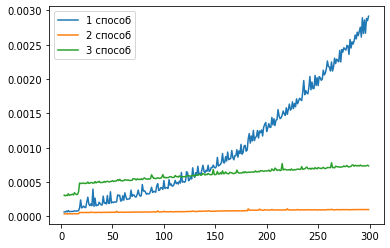

In [53]:
#сравнение времени
times1 = []
times2 = []
times3 = []
N = 300
for i in range(3, N):
    time1 = 0
    time2 = 0
    time3 = 0
    f = np.ones(i)
    for j in range(100):
        A = generate_random_striped_matrix(i, 1)
        B = generate_random_striped_matrix(i, 2)
        C = generate_random_striped_matrix(i, 3)
        start = time.time()
        x = scipy.linalg.solve(A, f)
        end = time.time()
        time1 += end - start  
        start = time.time()
        x = scipy.linalg.solve_banded((1, 1), B, f)
        end = time.time()
        time2 += end - start  
        start = time.time()
        x = spsolve(C,f)
        end = time.time()
        time3 += end - start
    time1 /= 100
    time2 /= 100
    time3 /= 100
    times1.append(time1)
    times2.append(time2)
    times3.append(time3)
plt.plot(np.array(range(3, N)), times1, label='1 способ')
plt.plot(np.array(range(3, N)), times2, label='2 способ')
plt.plot(np.array(range(3, N)), times3, label='3 способ')
plt.legend()

**4.** Покажите, что при больших n метод Гивенса требует

  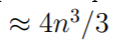  
  
  действий умножения.  Докажите, что метод Гаусса требует примерно в 4 раза меньше.  

Примените и тот, и другой метод для решения систем уравнений, используя библиотечные функции, и продемонстрируйте эту разницу измерением времени работы

**Решение.**
Метод Гаусса требует $\frac{n(n+1)(2n + 1)}{6} \sim \frac{n^3}{3}$ действий умножения. На i-м шаге метода Гивенса каждая строка вычисляется за $4(n-i)$ операций: $4+...+4(n-1)^2+4n^2 \sim \frac{4n^3}{3}$.
Таким образом, метод Гаусса требует примерно в 4 раза меньше.

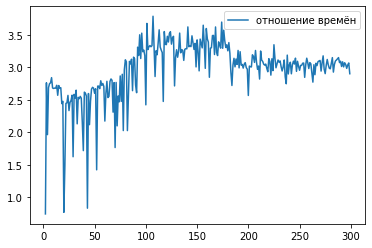

In [61]:
y = []
N = 300
for i in range(2, N):
    time1 = 0
    time2 = 0
    f = np.ones(i)
    for j in range(100):
        A = np.random.uniform(-1, 1, size=[i, i])
        start = time.time()
        q, r = scipy.linalg.qr(A) #время QR-разложения
        end = time.time()
        time1 += end - start 
        start = time.time()
        p, l, u = scipy.linalg.lu(A) #время LU-разложения
        end = time.time()
        time2 += end - start 
    y.append(time1/time2)
plt.plot(np.array(range(2, N)), y, label='отношение времён')
plt.legend()

Как видно, отношение времён в среднем меньше 4 (скорее, 3).

**5.** Реализовать итерационный метод Гаусса решения СЛАУ и метод простой итерации. Использовать данные методы для решения систем различных размеров. Оценить скорость работы методов (необходимое количество операций на одну итерацию) в зависимости от размера системы.

In [77]:
def simple_iteration(A, f, tau, eps): #метод простой итерации
    A = np.array(A)
    f = np.array(f)
    n = A.shape[0]
    x = np.zeros(n)
    iter = 0
    while (np.linalg.norm(((np.eye(n) - tau * A) @ x.reshape(n, 1)).reshape(1, n) + tau * f - x) > eps) & (np.linalg.norm(((np.eye(n) - tau * A) @ x.reshape(n, 1)).reshape(1, n) + tau * f - x) < 1e6):
        x = ((np.eye(n) - tau * A) @ x.reshape(n, 1)).reshape(1, n) + tau * f
        iter += 1
    return x, iter

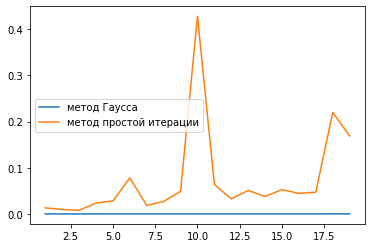

In [81]:
times1 = []
times2 = []
N = 20
for i in range(1, N):
    time1 = 0
    time2 = 0
    f = np.ones(i)
    for j in range(100):
        A = np.diag(np.random.uniform(size=i))
        start = time.time()
        x = np.linalg.solve(A, f)
        end = time.time()
        time1 += end - start        
        start = time.time()
        x, iters = simple_iteration(A, f, 1, 1e-6)
        end = time.time()
        time2 += end - start                
    time1 /= 100
    time2 /= 100
    times1.append(time1)
    times2.append(time2)
plt.plot(np.array(range(1, N)), times1, label='метод Гаусса')
plt.plot(np.array(range(1, N)), times2, label='метод простой итерации')
plt.legend()

**6.** Ответьте на вопрос - при каких значениях параметра метода простой итерации он сходится? Напишите генератор случайных симметричных положительно определённых матриц и программу, которая проверяет данное утверждение, выбирая несколько значений параметра МПИ, лежащих в том диапазоне, в котором этот метод сходится.

Проверка предусматривает вычисление скорости сходимости итерационного процесса путём сравнения невязок между собой. 



In [ ]:
f = np.ones(20)
cases = 0
for i in range(5):
    A = np.random.uniform(-1, 1, size=[20, 20])
    A = A.T@A
    values, vect = np.linalg.eig(A)
    max_val = np.max(values)
    tau = np.random.uniform(0, 2 / max_val)
    x, iter = simple_iteration(A, f, tau, 1e-3)
    if iter < int(1e6):
        cases += 1
print("Сходимость в " + str(cases/15) + "% случаев.")
